In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
cor = df.corr()

In [8]:
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

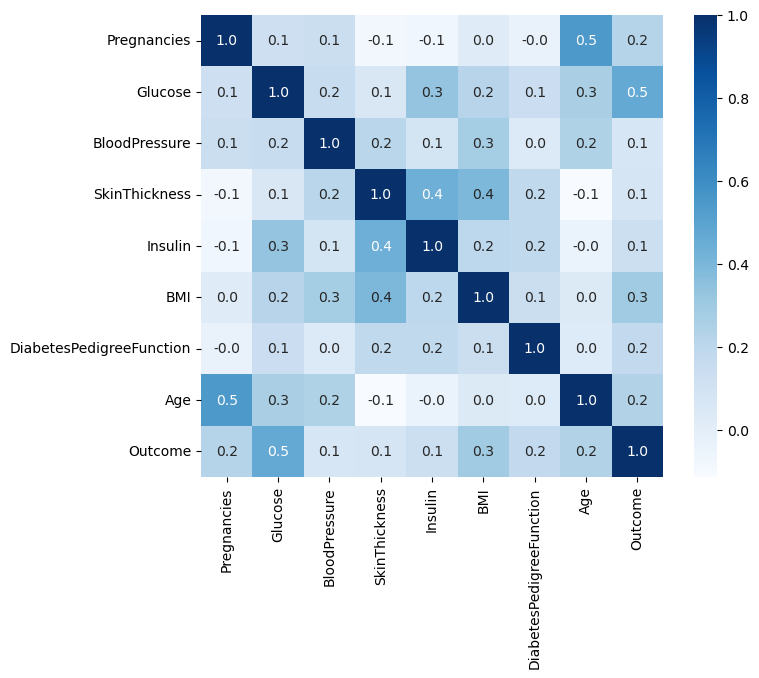

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(cor,fmt='.1f',annot = True,cmap='Blues',cbar=True,square=True)
plt.show()

Glucose and BMI has highest correlation with diabetes 

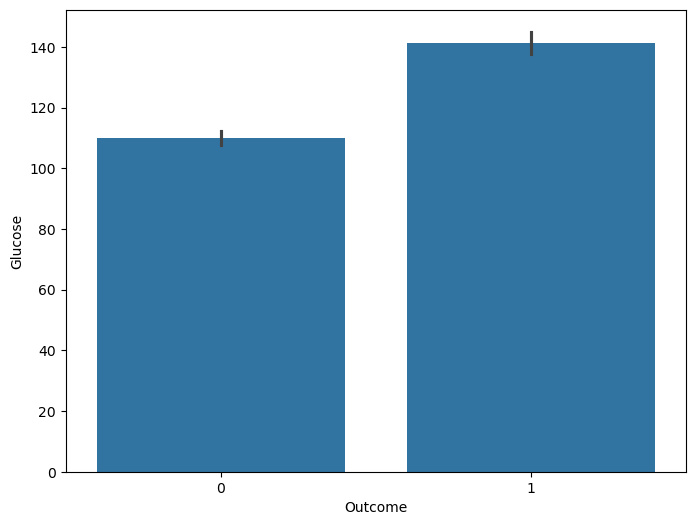

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(x='Outcome',y='Glucose',data=df)
plt.show()

Clearly , Glucose is a key parameter.


Let's try to fit a model

Let's try knn 

In [19]:
X = df.drop(columns='Outcome')
Y = df['Outcome']

In [20]:
X.shape

(768, 8)

In [21]:
Y.shape

(768,)

Let's standarize the data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

In [26]:
X = sc.fit_transform(X)

In [29]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [30]:
knn = KNeighborsClassifier(n_neighbors= 5)

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.2,stratify=Y)

In [97]:
X_train

array([[-0.84488505, -0.96691063, -0.36733675, ..., -0.6082704 ,
         0.3265464 , -0.78628618],
       [ 0.3429808 ,  0.1597866 ,  0.45982725, ..., -0.30366421,
        -0.09929033,  0.57511787],
       [-0.54791859, -0.49745345, -0.57412775, ...,  0.36900779,
        -0.74559573, -0.70119842],
       ...,
       [-0.84488505, -0.74783062,  0.04624525, ...,  0.77514938,
        -0.76673656, -0.27575966],
       [ 1.82781311, -0.30967058,  0.04624525, ..., -0.57019463,
        -0.9992857 ,  0.57511787],
       [ 0.04601433,  0.72313521, -0.57412775, ..., -0.31635613,
        -0.55834837,  0.31985461]])

In [33]:
Y_test.shape

(154,)

In [34]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [35]:
preds1 = knn.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(preds1,Y_test))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       105
           1       0.54      0.59      0.56        49

    accuracy                           0.71       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.72      0.71      0.71       154



Let's try SVM

In [38]:
from sklearn.svm import SVC

In [67]:
svc = SVC(kernel='linear',C=1.0)

In [98]:
X_train

array([[-0.84488505, -0.96691063, -0.36733675, ..., -0.6082704 ,
         0.3265464 , -0.78628618],
       [ 0.3429808 ,  0.1597866 ,  0.45982725, ..., -0.30366421,
        -0.09929033,  0.57511787],
       [-0.54791859, -0.49745345, -0.57412775, ...,  0.36900779,
        -0.74559573, -0.70119842],
       ...,
       [-0.84488505, -0.74783062,  0.04624525, ...,  0.77514938,
        -0.76673656, -0.27575966],
       [ 1.82781311, -0.30967058,  0.04624525, ..., -0.57019463,
        -0.9992857 ,  0.57511787],
       [ 0.04601433,  0.72313521, -0.57412775, ..., -0.31635613,
        -0.55834837,  0.31985461]])

In [68]:
svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [69]:
preds2 = svc.predict(X_test)

In [70]:
print(classification_report(preds2,Y_test))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       109
           1       0.52      0.62      0.57        45

    accuracy                           0.72       154
   macro avg       0.67      0.69      0.68       154
weighted avg       0.74      0.72      0.73       154



In [71]:
preds3 = svc.predict(X_train)

In [72]:
print(classification_report(preds3,Y_train))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       448
           1       0.59      0.76      0.66       166

    accuracy                           0.79       614
   macro avg       0.74      0.78      0.76       614
weighted avg       0.82      0.79      0.80       614



Since SVM has a bit better precision and recall , we select SVM with linear kernel

Final prediction model 

In [94]:
def Diabetes_prediction(data):
    nums = np.asarray(data)
    r_arr = nums.reshape(1,-1)
    new_arr = sc.tranform(r_arr)
  
    p4 = svc.predict(new_arr)
    
    return p4

In [101]:
data = (8,183,64,0,0,23.3,0.672,32)
Diabetes_prediction(data)

array([1], dtype=int64)

In [100]:
d = (6,148,72,35,0,33.6,0.627,50)
Diabetes_prediction(d)

array([1], dtype=int64)

In [99]:
d2 = (0,137,40,35,168,43.1,2.288,33)
Diabetes_prediction(d2)

array([1], dtype=int64)